Importing Libraies

In [15]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
# Importing the dataset
# data set having 1.6 million tweets
DATASET_COLUMNS  = ["label","text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('C:\\Users\\Akanksha Uniyal\\MY_Projects\\SpamClassifer\\SpamClassification.csv', encoding=DATASET_ENCODING , names=DATASET_COLUMNS)


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [18]:
text = dataset['text']
hamOrSpam = dataset['label']

In [19]:
text.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [20]:
text.replace('ham',1)
text.replace('spam',0)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ã¼ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [21]:
hamOrSpam.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

<BarContainer object of 2 artists>

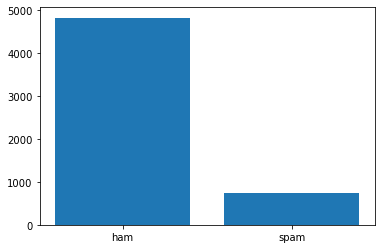

In [22]:
# Plotting the distribution for dataset.

distribution = dataset.label.value_counts()
plt.figure()
plt.bar(distribution.index, distribution.values)

In [23]:
!pip install contractions

In [24]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Akanksha
[nltk_data]     Uniyal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\Akanksha
[nltk_data]     Uniyal\AppData\Roaming\nltk_data...


True

Preprocessing

In [25]:
import contractions 
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [26]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
STOPWORDS = set(stopwords.words('english'))

In [27]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [28]:
def to_lowercase(text):
    text=text.lower()
    return text

# Removing URLs from a sample text
def remove_URL(text):
    return re.sub(r"http\S+", " URLs", text)

#Replace contractions in string of text
def replace_contractions(text):
    text = contractions.fix(text)
    return text
# removing @tags or hashtags
def cleaning_hashtag(text):
    return re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])",' Hashtag',text)

# Removing Stopwords from text
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# Cleaning and removing the above emojis list from the tweet text
def cleaning_emojis(text):
    return " ".join([word for word in str(text).split() if word not in emojis])

def replace_numbers(text):
    return re.sub('[0-9]+', ' ', text)

def remove_punctuation(text):
  return  re.sub(r'[^\w\d\s]', ' ',text)


In [29]:
# normalization  of text
def normalize(text):
  text = to_lowercase(text)
  text = remove_URL(text)
  text = replace_contractions(text)
  text = cleaning_hashtag(text)
  text = cleaning_stopwords(text)
  text = cleaning_emojis(text)
  text = replace_numbers(text)
  text = remove_punctuation(text)
  return text


In [30]:
# Removing word stem
def stem_words(words):
    # Stem words in list of tokenized words
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

In [31]:
# Lemmatizing text 
def lemmatize_verbs(words):
    # Lemmatize verbs in list of tokenized words
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas



In [32]:
def combine_single(words):
  words = " ".join(words)
  return words

In [33]:
#preprocessing of dataset
def process_dataset(text_data):
  text_data = text.apply(lambda x: normalize(x))
  text_data= text_data.apply (lambda x: x.split())
  text_data= text_data.apply(lambda x: stem_words(x))
  text_data= text_data.apply(lambda x: lemmatize_verbs(x))
  text_data= text_data.apply (lambda x: combine_single(x))

  return text_data

In [34]:
#preprocessing of text 
def process_text(text_data):
  text_data = normalize(text_data)
  text_data= text_data.split()
  text_data= stem_words(text_data)
  text_data= lemmatize_verbs(text_data)
  text_data= combine_single(text_data)

  return text_data

In [36]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Akanksha
[nltk_data]     Uniyal\AppData\Roaming\nltk_data...


True

In [37]:
# creating a column to store clean text or processed text
dataset['clean_text'] = process_dataset(text)

In [38]:
dataset.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point hasht crazy hasht hasht avail ...
1,ham,Ok lar... Joking wif u oni...,ok lar hasht hasht hasht jok wif on hasht hash...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,fre entry wkly comp win fa cup fin tkts st may...
3,ham,U dun say so early hor... U c already then say...,dun say ear hor hasht hasht hasht c already sa...
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf hasht liv around though


Word cloud for Positive data

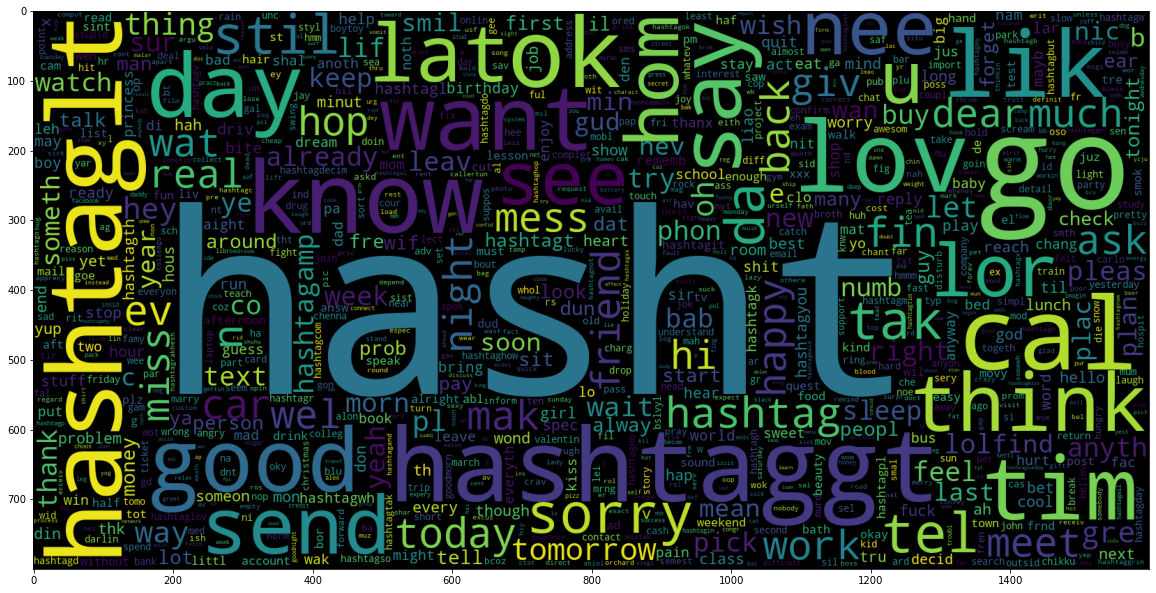

In [39]:
data_ham = dataset['clean_text'][dataset['label']=='ham']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(data_ham))
plt.imshow(wc)

Word cloud for negative data

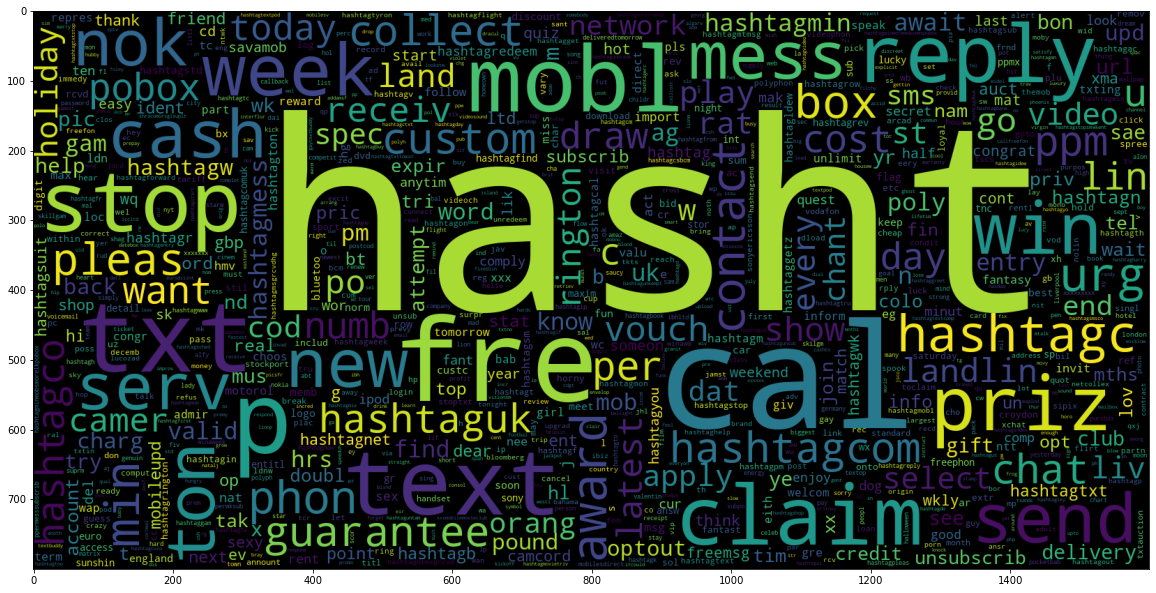

In [40]:
data_spam= dataset['clean_text'][dataset['label']=='spam']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(data_spam))
plt.imshow(wc)

Splitting the Data

In [41]:
# 95% data is for training and 5% is for testing
X_train, X_test, y_train, y_test = train_test_split(dataset['clean_text'], dataset['label'],test_size = 0.05, random_state = 1)

TF-IDF Vectoriser

In [42]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

Tranforming the dataset

In [43]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

Evaluate Model Function

In [44]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    #ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    ax.set_title('Confusion Matrix \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()


BernoulliNB Model

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98       243
        spam       1.00      0.67      0.80        36

    accuracy                           0.96       279
   macro avg       0.98      0.83      0.89       279
weighted avg       0.96      0.96      0.95       279



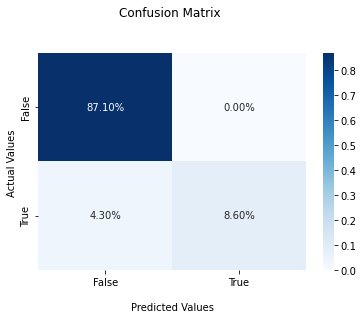

In [45]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

LinearSVC Model

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       243
        spam       0.94      0.94      0.94        36

    accuracy                           0.99       279
   macro avg       0.97      0.97      0.97       279
weighted avg       0.99      0.99      0.99       279



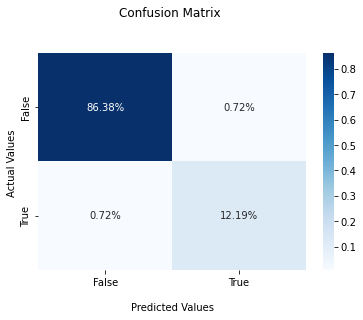

In [46]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

Logistic Regression Model

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       243
        spam       0.97      0.86      0.91        36

    accuracy                           0.98       279
   macro avg       0.97      0.93      0.95       279
weighted avg       0.98      0.98      0.98       279



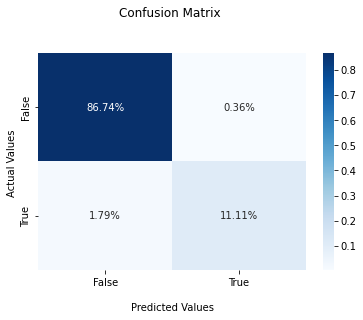

In [47]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

In [57]:
if __name__=="__main__":
    # Loading the models.
    #vectoriser, LRmodel = load_models()
    # Text to classify should be in a list.
    sentence =  str(input("Enter text : "))
    S = process_text(sentence)
    text_list=[]
    text_list.append(S)
    S = vectoriser.transform(text_list)
    hamOrSpam_Checking = SVCmodel.predict(S)
    if(hamOrSpam_Checking[0]=="spam"):
      print("Spam")
    else :
      print("ham")

Enter text : Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.
ham
ham
